In [1]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)



<module 'helper_visa' from 'C:\\Users\\mathusla\\Documents\\MATHUSLA\\JupyterNotebooks\\Hardware\\Keysight\\..\\helper_visa.py'>

# Step 1: connect to the scope
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

In [2]:
scope = vs.connect(address = "TCPIP0::10.0.0.4::inst0::INSTR", timeout=30_000) # set 30 second

Connected to VISA [TCPIP0::10.0.0.4::inst0::INSTR]:  KEYSIGHT TECHNOLOGIES,EXR054A,MY63160110,11.50.00201



# Example 1: read the current waveform from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

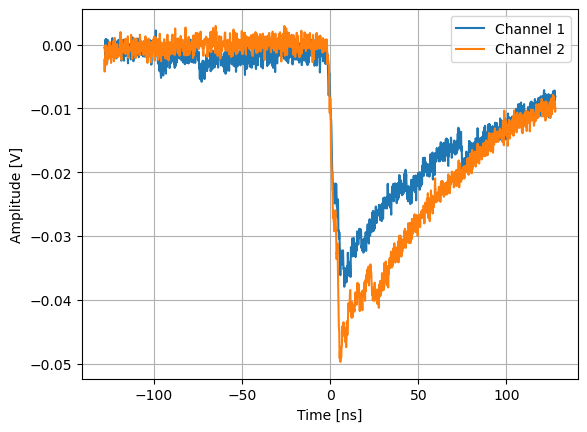

In [3]:
trigger_channel = 1
read_channel = [1,2]
acquire_length = 2048

data,time_series=vs.read_waveform(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)

for ch in data:
    plot(time_series*1e9, data[ch], label=f"Channel {ch}")

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
legend()
grid()

# Example 2: repetitively read multiple waveforms from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

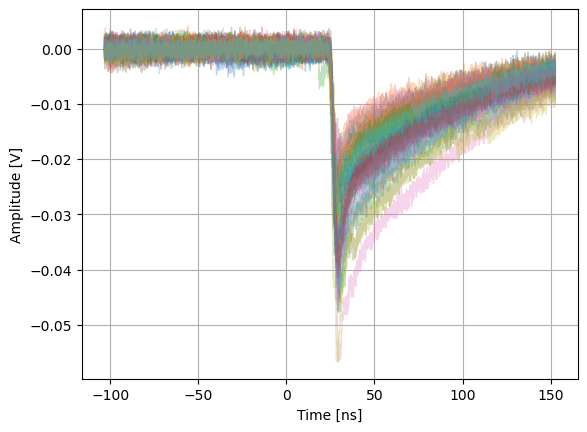

In [10]:
data_save = vs.get_events(scope, Nevents = 40, print_every_n = 4, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
time_series = data_save["metadata"]["time_series"]*1e9

for i in range(len(data_save[1])):
    plot(time_series, data_save[2][i],alpha=0.3, linewidth=1)

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
grid()

# Acquire the data

In [8]:
# Calibration
data_save = vs.get_events(scope, Nevents = 7200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
# joblib.dump(data_save, "calibration_ch1_ch2.joblib",compress =False) # Dark current on CH1 and CH2, threshold CH1=1 mV 0.5 eh


400/7200 events acquired, time elapsed 9.9 s, time from last print 9.9 s
800/7200 events acquired, time elapsed 19.9 s, time from last print 10.0 s
1200/7200 events acquired, time elapsed 29.9 s, time from last print 10.0 s
1600/7200 events acquired, time elapsed 39.6 s, time from last print 9.7 s
2000/7200 events acquired, time elapsed 49.4 s, time from last print 9.8 s
2400/7200 events acquired, time elapsed 59.3 s, time from last print 9.9 s
2800/7200 events acquired, time elapsed 69.2 s, time from last print 9.9 s
3200/7200 events acquired, time elapsed 79.1 s, time from last print 9.9 s
3600/7200 events acquired, time elapsed 88.7 s, time from last print 9.6 s
4000/7200 events acquired, time elapsed 98.4 s, time from last print 9.8 s
4400/7200 events acquired, time elapsed 108.3 s, time from last print 9.8 s
4800/7200 events acquired, time elapsed 118.0 s, time from last print 9.7 s
5200/7200 events acquired, time elapsed 127.9 s, time from last print 9.9 s
5600/7200 events acquir

['calibration_ch1_ch2.joblib']

In [7]:
# Ch1 CH2 coincidence
data_save = vs.get_events(scope, Nevents = 7200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
# joblib.dump(data_save, "muon_coinc_ch1_ch2.joblib",compress =False) # threshold CH1=20 mV ~8eh
# joblib.dump(data_save, "muon_coinc_ch1_ch2_coinc.joblib",compress =False) # threshold CH1=10 mV ~8eh && CH2=10 mV ~8eh

400/7200 events acquired, time elapsed 251.1 s, time from last print 251.1 s
800/7200 events acquired, time elapsed 508.3 s, time from last print 257.2 s
1200/7200 events acquired, time elapsed 771.9 s, time from last print 263.6 s
1600/7200 events acquired, time elapsed 1026.7 s, time from last print 254.8 s
2000/7200 events acquired, time elapsed 1290.8 s, time from last print 264.0 s
2400/7200 events acquired, time elapsed 1551.7 s, time from last print 261.0 s
2800/7200 events acquired, time elapsed 1806.2 s, time from last print 254.4 s
3200/7200 events acquired, time elapsed 2081.2 s, time from last print 275.0 s
3600/7200 events acquired, time elapsed 2358.8 s, time from last print 277.7 s
4000/7200 events acquired, time elapsed 2621.3 s, time from last print 262.4 s
4400/7200 events acquired, time elapsed 2853.2 s, time from last print 232.0 s
4800/7200 events acquired, time elapsed 3121.1 s, time from last print 267.9 s
5200/7200 events acquired, time elapsed 3379.7 s, time fr

['muon_coinc_ch1_ch2_coinc.joblib']

In [11]:
# Laser+WLS
data_save = vs.get_events(scope, Nevents = 5000, print_every_n = 500, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "waveform_laser.joblib",compress =False) # CH1: trigger, CH2: laser, mean~20mV


500/5000 events acquired, time elapsed 12.6 s, time from last print 12.6 s
1000/5000 events acquired, time elapsed 25.3 s, time from last print 12.7 s
1500/5000 events acquired, time elapsed 37.9 s, time from last print 12.6 s
2000/5000 events acquired, time elapsed 50.5 s, time from last print 12.6 s
2500/5000 events acquired, time elapsed 63.2 s, time from last print 12.7 s
3000/5000 events acquired, time elapsed 75.7 s, time from last print 12.6 s
3500/5000 events acquired, time elapsed 88.5 s, time from last print 12.7 s
4000/5000 events acquired, time elapsed 101.1 s, time from last print 12.7 s
4500/5000 events acquired, time elapsed 113.9 s, time from last print 12.8 s
5000/5000 events acquired, time elapsed 126.7 s, time from last print 12.8 s


['waveform_laser.joblib']

In [28]:
data_save = vs.get_events(scope, Nevents = 2000, print_every_n = 200, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "waveform_scintillator.joblib",compress =False)

200/2000 events acquired, time elapsed 100.7 s, time from last print 100.7 s
400/2000 events acquired, time elapsed 207.5 s, time from last print 106.7 s
600/2000 events acquired, time elapsed 315.7 s, time from last print 108.2 s
800/2000 events acquired, time elapsed 421.3 s, time from last print 105.7 s
1000/2000 events acquired, time elapsed 519.9 s, time from last print 98.6 s
1200/2000 events acquired, time elapsed 622.2 s, time from last print 102.3 s
1400/2000 events acquired, time elapsed 726.9 s, time from last print 104.7 s
1600/2000 events acquired, time elapsed 832.6 s, time from last print 105.6 s
1800/2000 events acquired, time elapsed 936.0 s, time from last print 103.4 s
2000/2000 events acquired, time elapsed 1041.6 s, time from last print 105.6 s
